# Getting Physiobank data with the WFDB package #

An efficient way of downloading all of the records of a given Physiobank database is using the wfdb Python package (https://github.com/MIT-LCP/wfdb-python). In this case, the Gait Dynamics in Neuro-Degenerative Disease records will be downloaded.

In [90]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
from scipy import stats
import wfdb
import re

%matplotlib inline

First, let's see a list of all the available Physiobank databases

In [2]:
dbs = wfdb.get_dbs()
display(dbs)

[['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database [sample excluded record]'],
 ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['chfdb', 'BIDMC Congestive Heart Failure Database'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['capslpdb', 'CAP Sleep Database'],
 ['crisdb', 'CAST RR Interval Sub-Study Database'],
 ['cves', 'Cerebral Vasoregulation in Elderly with Stroke'],
 ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'],
 ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'],
 ['challenge/2010/set-a', 'Challenge 2010 Training Set A'],
 ['challenge/2010/set-b', 'Challenge 2010 Test Set B'],
 ['challenge/2010/set-c', 'Challenge 2010 Test Set C'],
 ['challenge/2011/sim', 'Challenge 2011 Pilot Set'],
 ['challenge/2011/set-a', 'Challenge 2011 Training Set A'],
 ['challenge/2011/set-b', 'Chall

Let's download the _gaitndd_ database into our working directory

In [10]:
cwd = os.getcwd()
data_dir = cwd + '/data/'
wfdb.dl_database('gaitndd', dl_dir=data_dir)

Finished downloading files


The database also includes time series data in plain text format. These files have not been downloaded with the wfdb.dldatabase function. Using the following libraries it is possible to retrieve the necessary files from the links in the _gaitndd_ website

In [12]:
import urllib.request
from bs4 import BeautifulSoup
import requests

In [36]:
# Download all .ts files
url = 'https://physionet.org/physiobank/database/gaitndd'
r = requests.get(url)
soup = BeautifulSoup(r.text)
link = ''
for i, line in enumerate(soup.findAll('a', href=True)):
    link = line.get('href')
    if link[-3:] == '.ts':
        print('Downloading', link + '...')
        file_url = url + '/' + link
        urllib.request.urlretrieve(file_url, data_dir + link)

### Test record
Now let's take a look at a sample record from this dataset.

In [49]:
test_record_header = wfdb.rdheader("data/park1")
display(test_record_header.__dict__)

{'record_name': 'park1',
 'n_sig': 2,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 90000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['left-foot', 'right-foot'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['park1.let', 'park1.rit'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [1000.0, 1000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-96, 235],
 'checksum': [24342, -21509],
 'block_size': [0, 0]}

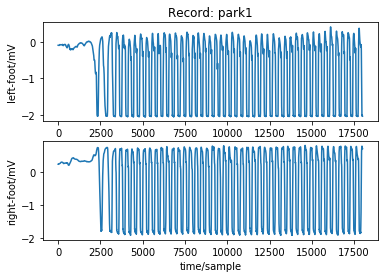

In [38]:
cwd = os.getcwd()
test_record = wfdb.rdrecord("data/park1", sampfrom=0, sampto=18000) # first minute of signal
wfdb.plot_wfdb(test_record)

In [39]:
header = ["Elapsed Time",
        "Left Stride Interval",
        "Right Stride Interval",
        "Left Swing Interval",
        "Right Swing Interval",
        "Left Swing Percent",
        "Right Swing Percent",
        "Left Stance Interval",
        "Right Stance Interval",
        "Left Stance Percent",
        "Right Stance Percent",
        "Double Support Interval",
        "Double Support Percent"]
test_df = pd.read_csv("data/park1.ts", sep="\t", names=header)

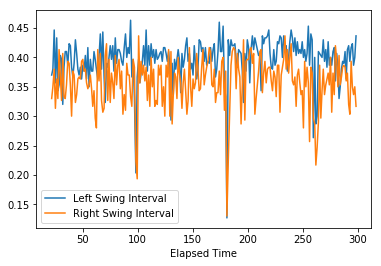

In [40]:
test_df.plot(x="Elapsed Time", y=["Left Swing Interval", "Right Swing Interval"])

In [41]:
test_df.head()

,Elapsed Time,Left Stride Interval,Right Stride Interval,Left Swing Interval,Right Swing Interval,Left Swing Percent,Right Swing Percent,Left Stance Interval,Right Stance Interval,Left Stance Percent,Right Stance Percent,Double Support Interval,Double Support Percent
0,21.7700,1.1333,1.0933,0.3700,0.3300,32.65,30.18,0.7633,0.7633,67.35,69.82,0.4333,38.24
1,22.8767,1.1067,1.1200,0.3800,0.3500,34.34,31.25,0.7267,0.7700,65.66,68.75,0.3767,34.04
2,24.0833,1.2067,1.1467,0.4467,0.3800,37.02,33.14,0.7600,0.7667,62.98,66.86,0.3800,31.49
3,25.1667,1.0833,1.1200,0.3567,0.3133,32.92,27.98,0.7267,0.8067,67.08,72.02,0.4133,38.15
4,26.3433,1.1767,1.1567,0.4333,0.3633,36.83,31.41,0.7433,0.7933,63.17,68.59,0.3800,32.29


In [42]:
test_df_mod = test_df.copy(deep=True)
test_df_mod["Time"] = test_df_mod["Elapsed Time"] - test_df_mod["Elapsed Time"].min()
test_df_mod = test_df_mod.drop(["Elapsed Time"], axis=1)
test_df_mod.describe()

,Left Stride Interval,Right Stride Interval,Left Swing Interval,Right Swing Interval,Left Swing Percent,Right Swing Percent,Left Stance Interval,Right Stance Interval,Left Stance Percent,Right Stance Percent,Double Support Interval,Double Support Percent,Time
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,1.134138,1.133903,0.396681,0.357743,34.984612,31.558816,0.737458,0.776165,65.015388,68.441184,0.379717,33.438612,138.898382
std,0.041802,0.048322,0.036865,0.042872,3.057061,3.591690,0.046641,0.054402,3.057061,3.591690,0.069708,5.631073,80.637757
min,1.013300,0.916700,0.126700,0.130000,11.520000,11.110000,0.650000,0.630000,60.740000,61.750000,0.273300,25.820000,0.000000
25%,1.106700,1.103300,0.383300,0.336700,34.210000,29.890000,0.710000,0.743300,63.320000,66.080000,0.340000,30.000000,69.426700
50%,1.133300,1.130000,0.400000,0.363300,35.670000,31.870000,0.730000,0.770000,64.330000,68.130000,0.373300,32.730000,138.660000
75%,1.160000,1.163300,0.416700,0.386700,36.680000,33.920000,0.753300,0.806700,65.790000,70.110000,0.396700,35.240000,208.706700
max,1.303300,1.343300,0.463300,0.436700,39.260000,38.250000,1.100000,1.040000,88.480000,88.890000,0.876700,76.670000,276.730000


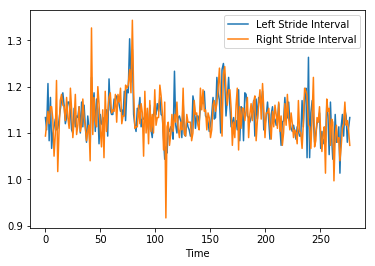

In [43]:
test_df_mod.plot(x="Time", y=["Left Stride Interval", "Right Stride Interval"])

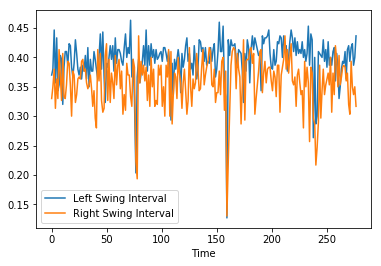

In [44]:
test_df_mod.plot(x="Time", y=["Left Swing Interval", "Right Swing Interval"])

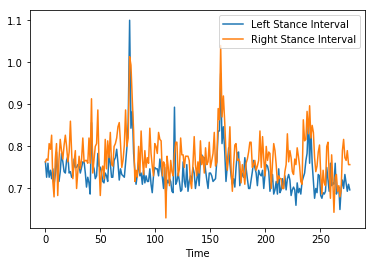

In [45]:
test_df_mod.plot(x="Time", y=["Left Stance Interval", "Right Stance Interval"])

### Decriptive statistics of records by disease

#### ALS

In [54]:
als_files = []
for file in os.listdir("data"):
    if file.startswith("als") and file.endswith(".ts"):
        als_files.append(file)

als_files.sort(key=lambda filename: int(filename[3:-3]))

In [62]:
als_dataframes = []
for file in als_files:
    path = os.path.join("data", file)
    df = pd.read_csv(path, sep="\t", names=header)
    als_dataframes.append(df)

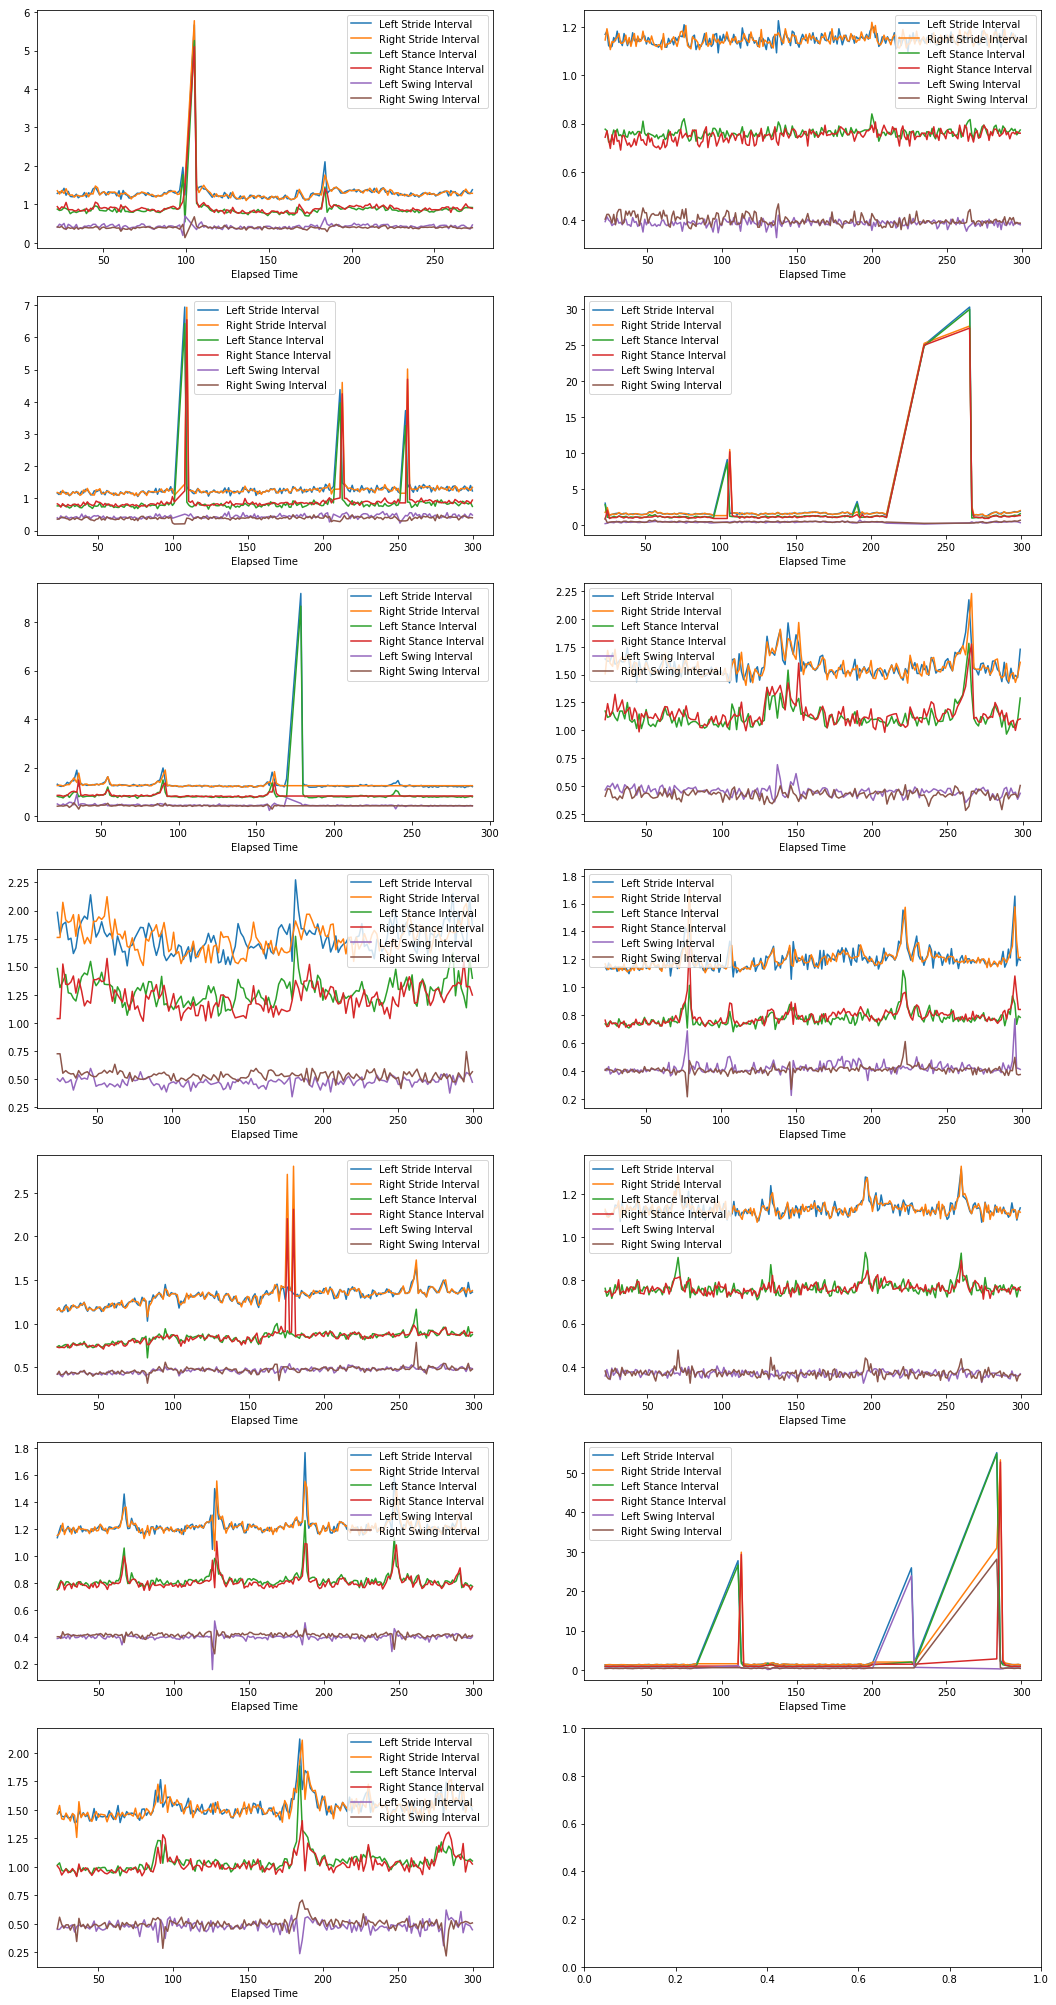

In [89]:
fig, axes = plt.subplots(figsize=(18, 36), nrows=(len(als_dataframes)//2)+1, ncols=2)
columns = ["Left Stride Interval",
           "Right Stride Interval",
           "Left Stance Interval",
           "Right Stance Interval",
          "Left Swing Interval",
          "Right Swing Interval"]
for i, df in enumerate(als_dataframes):
    df.plot(x="Elapsed Time", y=columns, ax=axes[i//2, i%2])

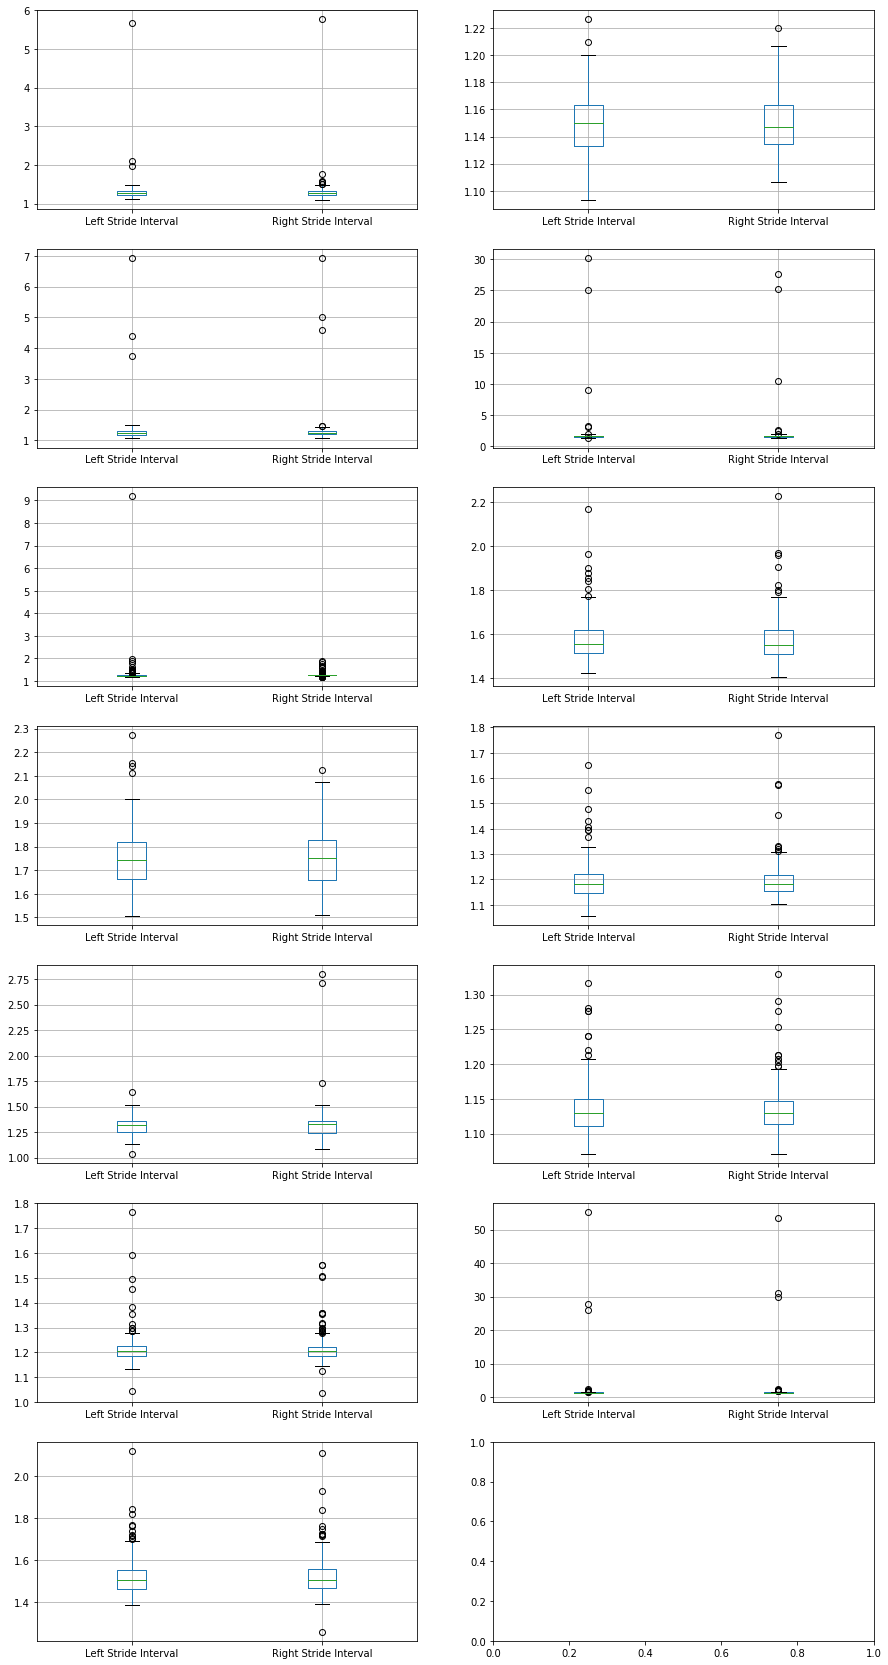

In [86]:
# There are some outliers -> get rid of them?
fig, axes = plt.subplots(figsize=(15, 30), nrows=(len(als_dataframes)//2)+1, ncols=2)
for i, df in enumerate(als_dataframes):
    df.boxplot(["Left Stride Interval", "Right Stride Interval"], ax=axes[i//2, i%2])

In [ ]:
# Are outliers errors or true measurements??
# Substitute outliers with average?

In [98]:
# Perform box-cox transformations on time series
columns = ["Left Stride Interval",
           "Right Stride Interval",
           "Left Stance Interval",
           "Right Stance Interval",
          "Left Swing Interval",
          "Right Swing Interval"]
for df in als_dataframes:
    for col in columns:
        df[col + " Corr."], _ = stats.boxcox(df[col])

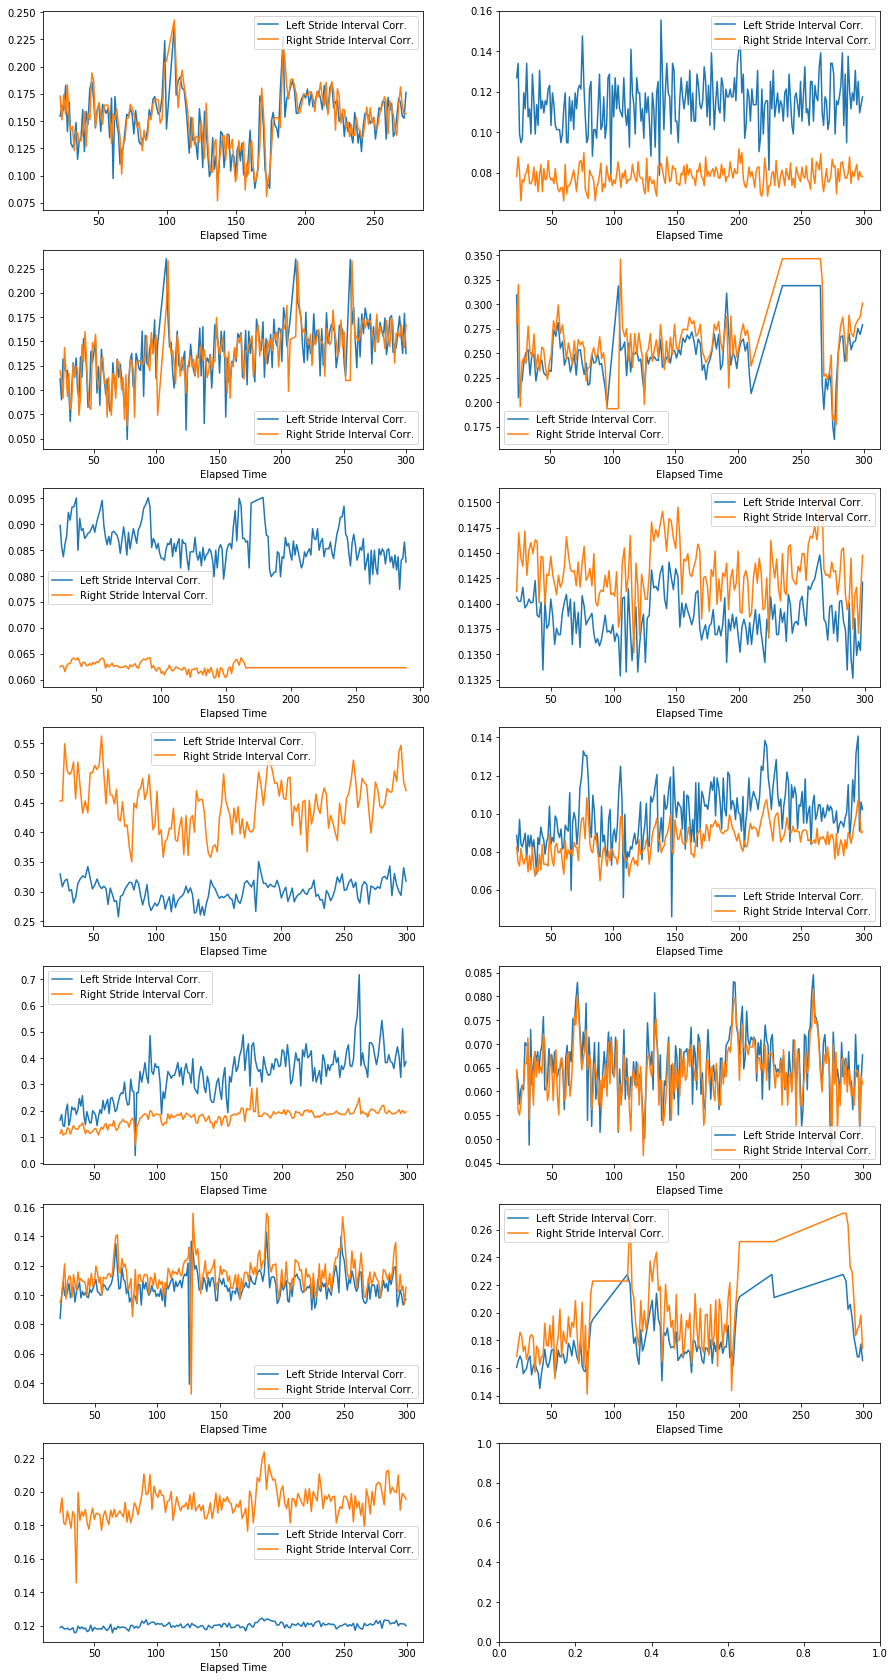

In [100]:
fig, axes = plt.subplots(figsize=(15, 30), nrows=(len(als_dataframes)//2)+1, ncols=2)
for i, df in enumerate(als_dataframes):
    df.plot(x="Elapsed Time", y=["Left Stride Interval Corr.", "Right Stride Interval Corr."], ax=axes[i//2, i%2])